### Visualizing relationship between payload and Flight Number

In [1]:
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [3]:
import pandas as pd

# Reading the CSV file
data = pd.read_csv('../data/processed/DataProcessed.csv')


In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,0,4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,1,5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,2,6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,3,7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,4,8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


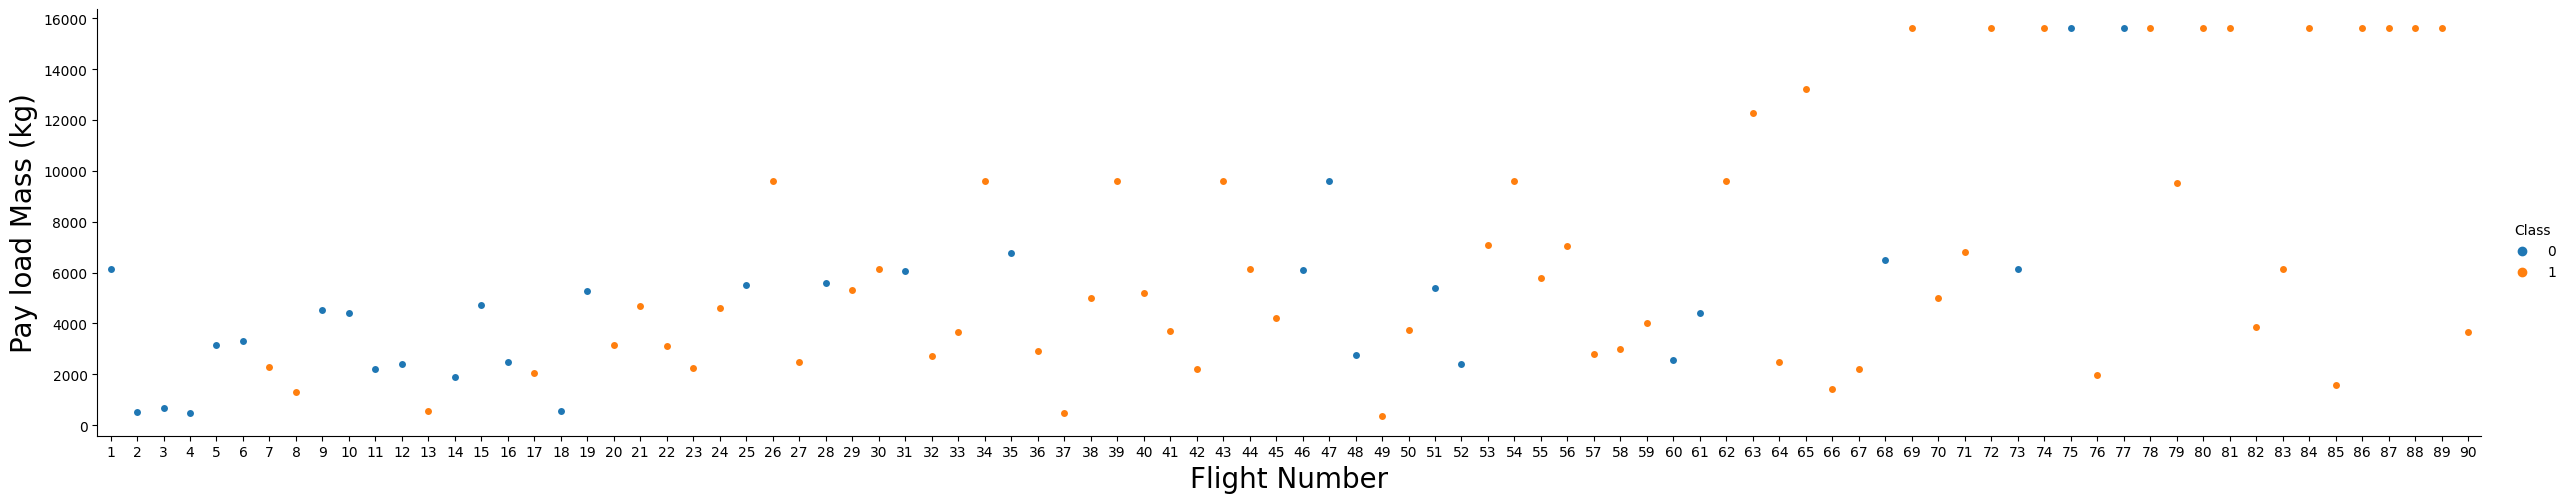

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=data, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### Visualizing the relationship between Flight Number and Launch Site

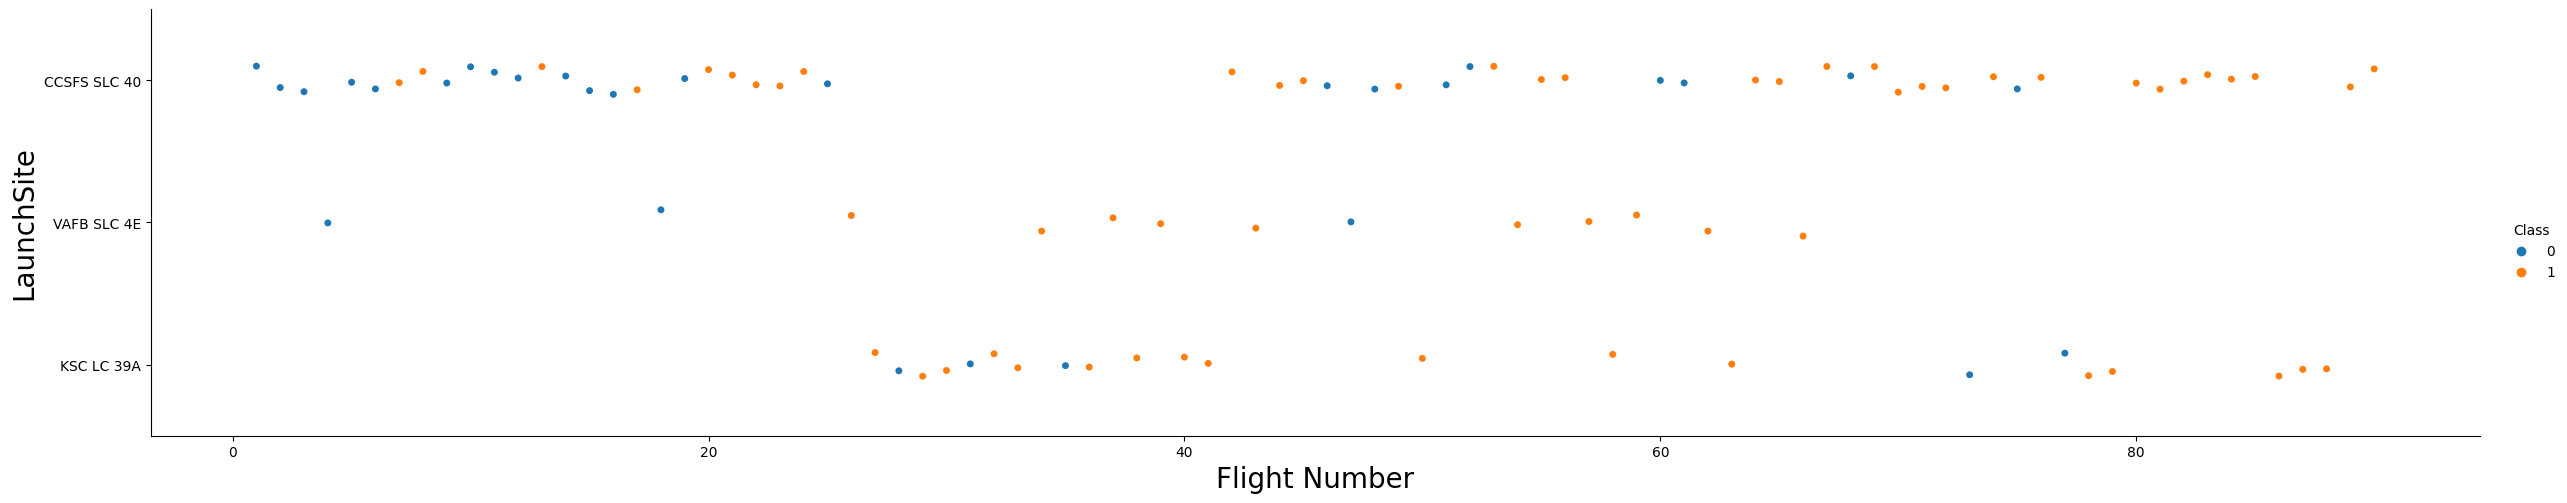

In [6]:
# Plotting a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data=data, aspect=5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

The sucsess of landing increased as flight number increased.

### Visualizing the relationship between Payload and Launch Site

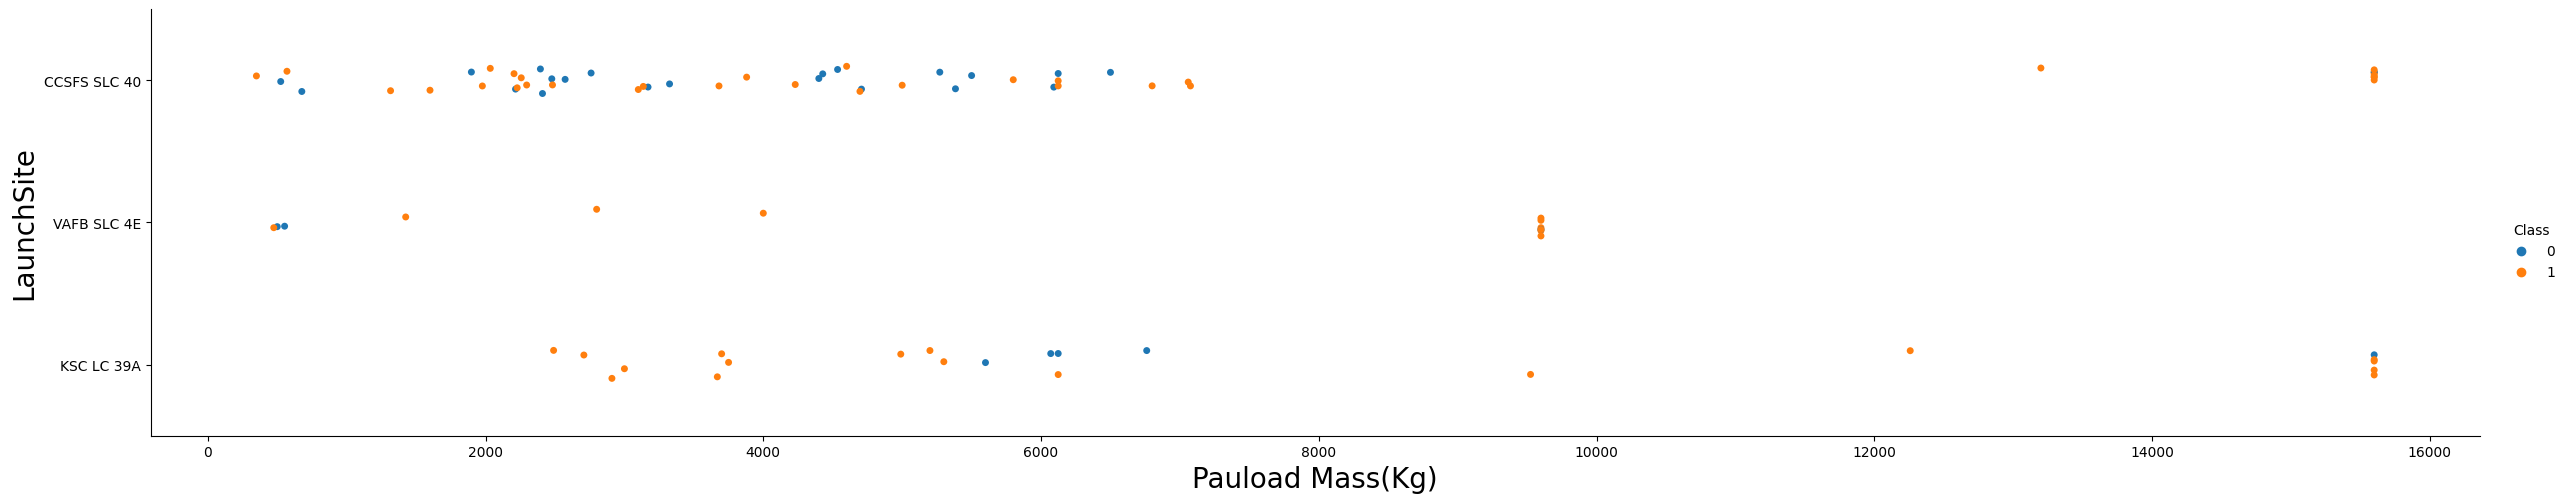

In [7]:
# Plotting a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='PayloadMass', hue='Class', data=data, aspect=5)
plt.xlabel("Pauload Mass(Kg)",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Most of the launches were carried out at CCSFS SLC-40, followed by KSC LC-39A and least launches were carried out at VAFB SLC 4E

### Visualizing the relationship between success rate of each orbit type

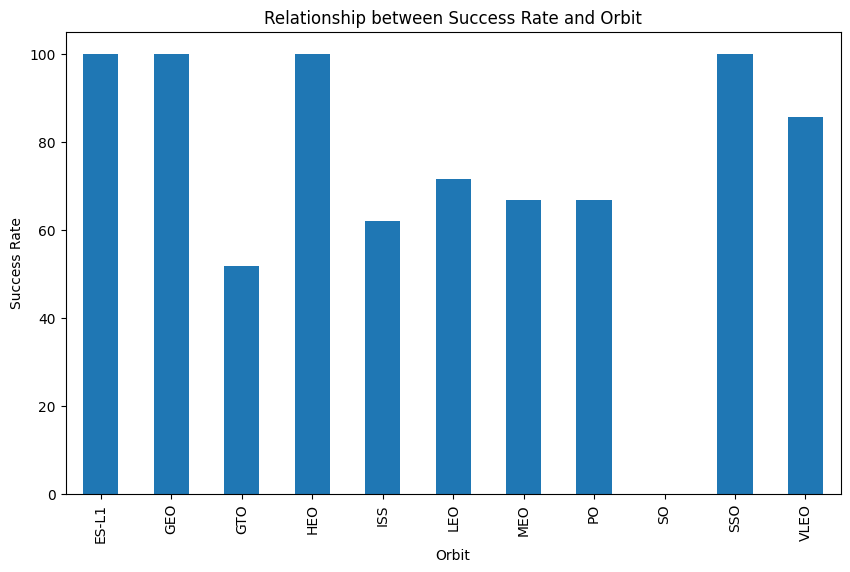

In [8]:
df_success=data.groupby('Orbit')['Class'].mean()*100
df_success.plot(kind='bar', figsize=(10,6))
plt.xlabel('Orbit') # add to x-label to the plot
plt.ylabel('Success Rate') # add y-label to the plot
plt.title('Relationship between Success Rate and Orbit') # add title to the plot

plt.show()

Orbits ES_L1, GEO, HEO and SSO have highest 100% success rate.

### Visualizing the relationship between FlightNumber and Orbit type

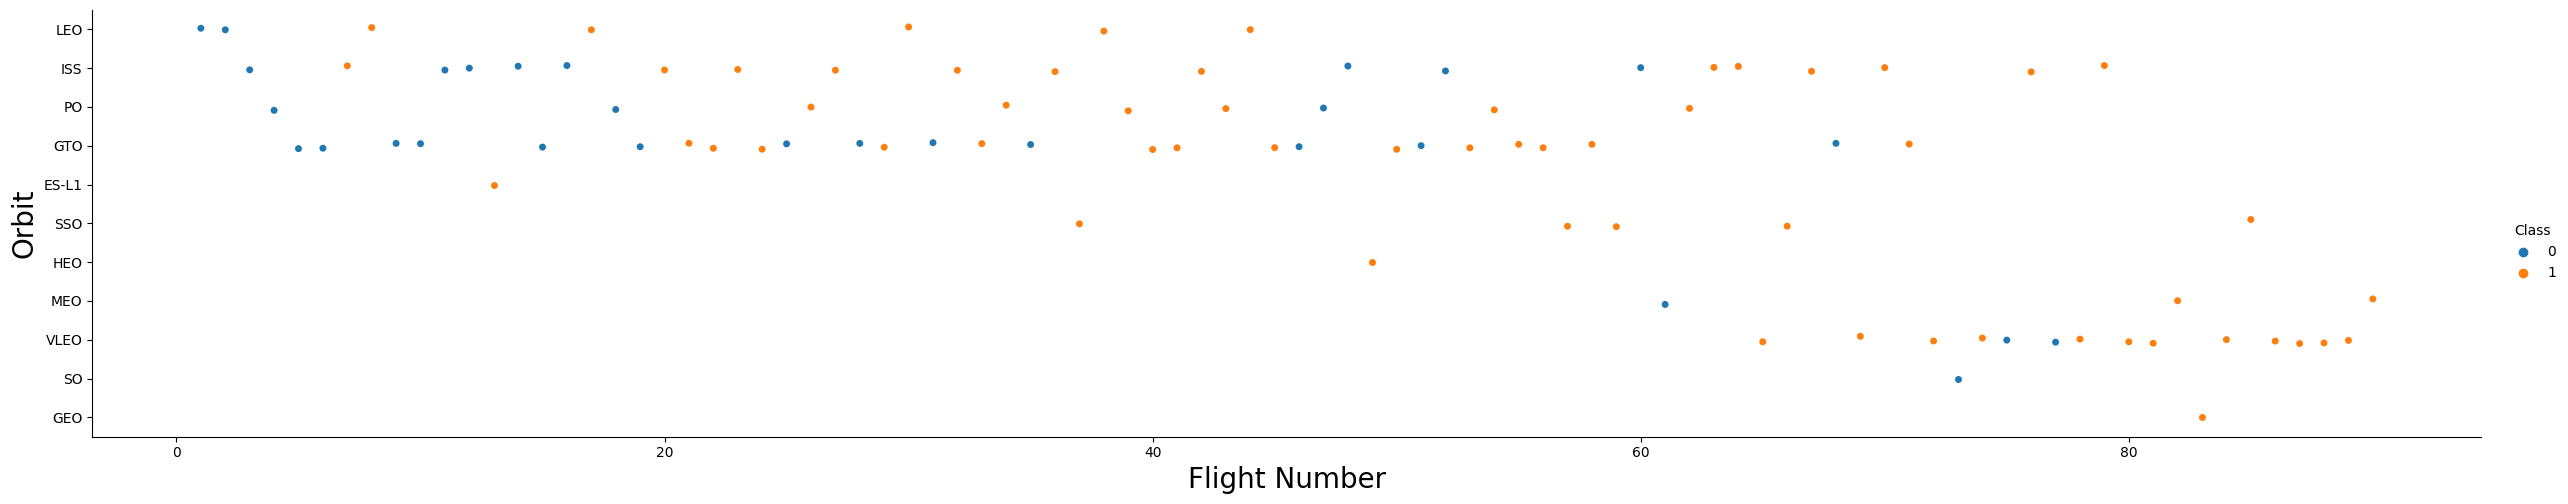

In [9]:
# Plotting a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y='Orbit', x='FlightNumber', hue='Class', data=data, aspect=5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

### Visualizing the relationship between Payload and Orbit type

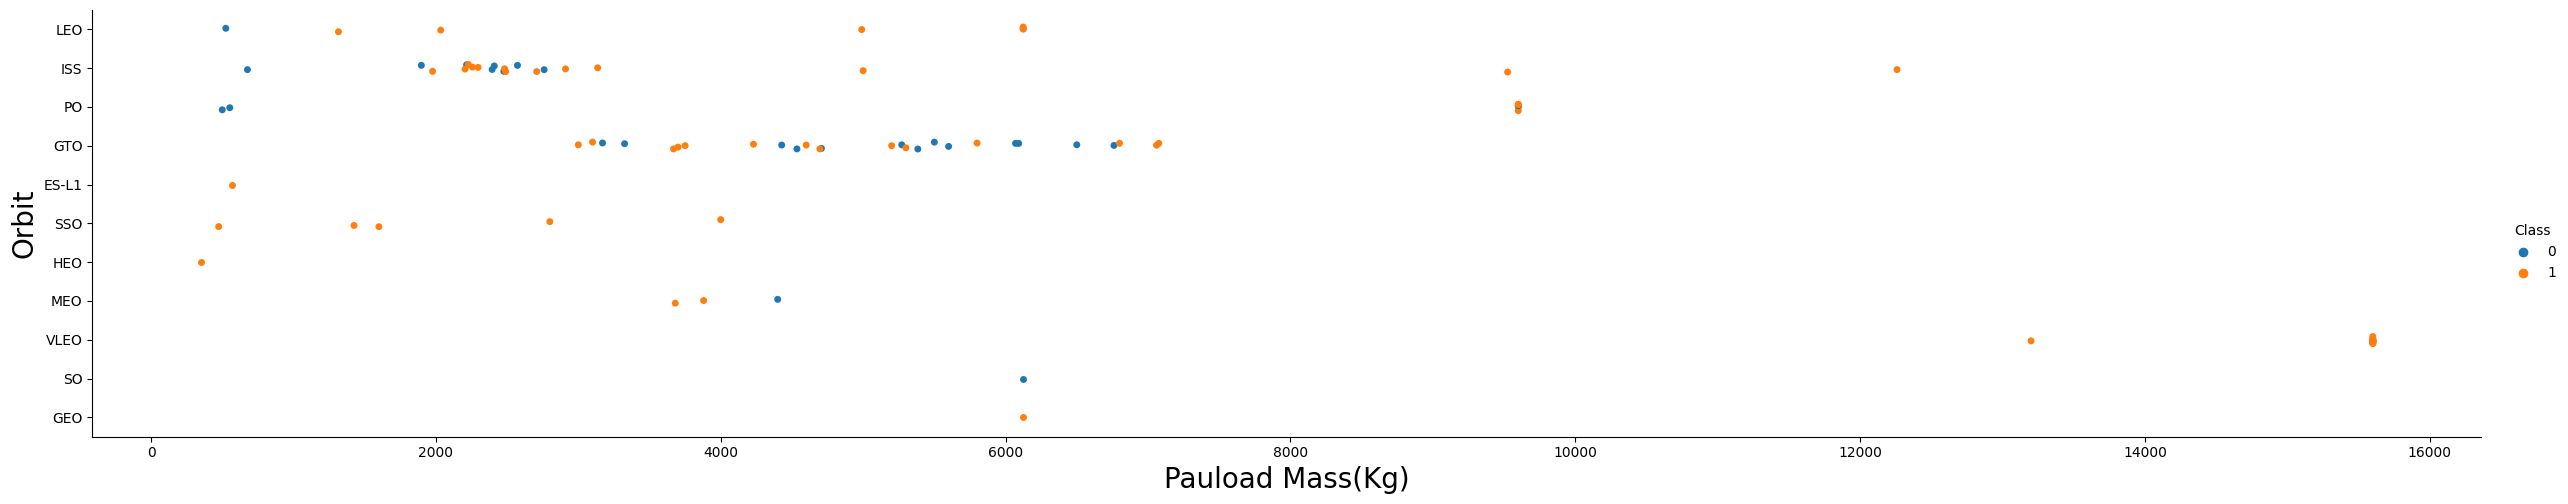

In [10]:
# Plotting a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y='Orbit', x='PayloadMass', hue='Class', data=data, aspect=5)
plt.xlabel("Pauload Mass(Kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

We observe that Heavy payloads have a negative influence on GTO orbits and positive on Polar LEO and ISS orbits

### Visualizing launch success yearly trend

In [11]:
data['Date']=data['Date'].astype(str)

In [12]:
# A function to Extract years from the date 
year=[]
def Extract_year(data):
    for i in data["Date"]:
        year.append(i.split("-")[0])
    return year

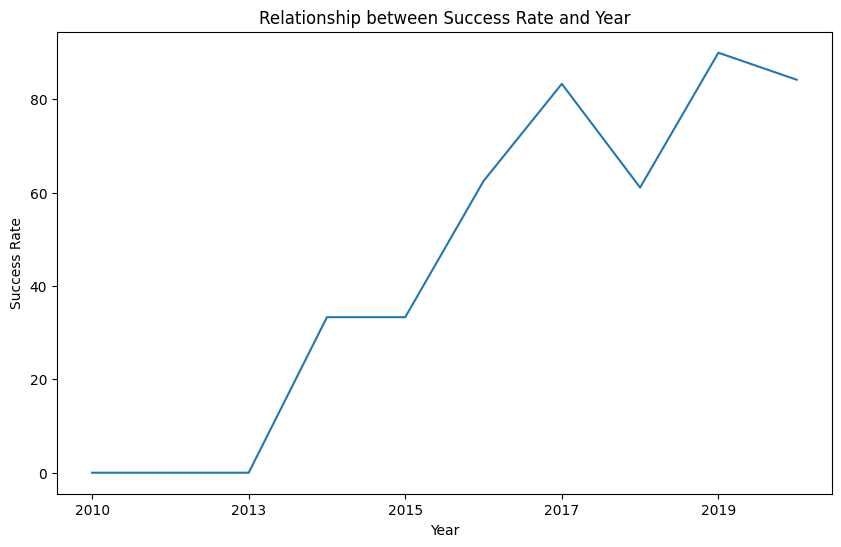

In [13]:
# Plotting a line chart with x axis to be the extracted year and y axis to be the success rate
Extract_year(data)
data['Year']=year
fig,ax=plt.subplots()
df_success1=data.groupby('Year')['Class'].mean()*100
df_success1.plot(kind='line', figsize=(10,6))
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Success Rate') # add y-label to the plot
plt.title('Relationship between Success Rate and Year') # add title to the plot

plt.show()

We can observe that the success rate since 2013 kept increasing till 2020.

In [14]:
df_success1.head()

Year
2010     0.000000
2012     0.000000
2013     0.000000
2014    33.333333
2015    33.333333
Name: Class, dtype: float64